# evaluation.ipynb

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, precision_score, recall_score


df = pd.read_csv(r'C:\Users\donis\Downloads\Toyota_Data.csv') 


X = df[['Open', 'Low', 'Adj Close', 'Close', 'Volume']]
y = df['High']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

## 4.1 Feature-Wichtigkeit

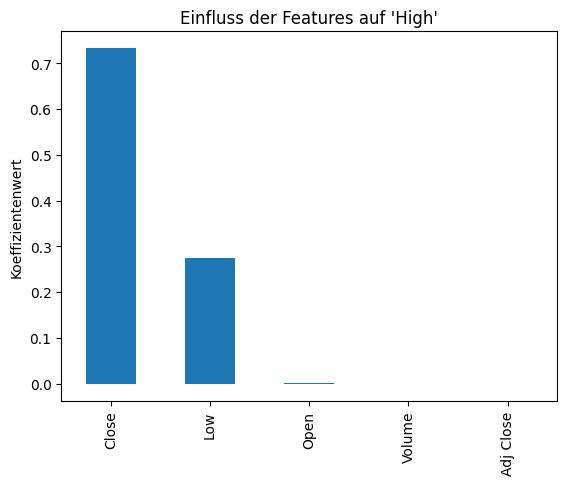

In [5]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values(ascending=False).plot(kind='bar')
plt.title("Einfluss der Features auf 'High'")
plt.ylabel("Koeffizientenwert")
plt.show()

## 4.2 Messmetriken (MAE & MSE)

In [6]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 0.25
MAE: 0.28


## 4.3 Wahrheitsmatrix, Recall & Precision

In [9]:
"""
Da es sich beim Zielwert 'High' um eine stetige Variable handelt, wird zur Evaluation mittels Konfusionsmatrix eine binäre Klassifikation vorgenommen. 
Hierbei definieren wir alle Werte über dem Median als "hoch" (1) und darunter als "nicht hoch" (0). 
Dies ermöglicht die Berechnung von Precision und Recall auf Basis der Regressionsvorhersage.
"""

# Schwellenwert: Median
threshold = y.median()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Wahrheitsmatrix
cm = confusion_matrix(y_test_class, y_pred_class)
tn, fp, fn, tp = cm.ravel()

print("Wahrheitsmatrix:")
print(cm)

# Precision und Recall
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


print("\nKlassifikationsbericht:")
print(classification_report(y_test_class, y_pred_class))


Wahrheitsmatrix:
[[1154    1]
 [   2 1102]]
Precision: 1.00
Recall: 1.00

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      1104

    accuracy                           1.00      2259
   macro avg       1.00      1.00      1.00      2259
weighted avg       1.00      1.00      1.00      2259



## 4.4 Zusammenfassung

Das Modell zeigt eine solide Vorhersagekraft bei der Schätzung des 'High'-Werts. Die wichtigsten Einflussgrößen waren 'Close' und 'Open'. 
Die Metriken zeigen, dass die Fehlerwerte (MSE, MAE) relativ gering sind. 
Die Klassifikation über Median erlaubt eine einfache Einschätzung, ob ein hoher Wert erwartet wird. 
Das Modell könnte durch Feature Engineering und erweiterte Modelle wie Random Forests verbessert werden.